In [ ]:
import ace_lensing
import numpy as np
import matplotlib.pyplot as plt

LOADING TRANING DATA

In [3]:
df = ace_lensing.load_training_data()
df

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/ace_lensing/model.py", line 148, in load_training_data
  File "/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/pandas/io/parquet.py", line 653, in read_parquet
  File "/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/pandas/io/parquet.py", line 68, in get_engine
ImportError: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - No module named 'pyarrow.parquet'
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 35

In [3]:
matching_rows = df[df['z'].round(2) == 1.5]

In [4]:
parameter_names = ["Om",	"h",	"w",	"s8",   "z"]

sample = 361
params = df[parameter_names].to_numpy()[sample]
mu_test = df["mu_vec"][sample] * np.sqrt(df["var"][sample]) +df["mean"][sample]
pdf_test = df["pdf"][sample] / np.sqrt(df["var"][sample])
pdf_test = pdf_test / np.trapz(pdf_test, mu_test)
mu, pdf = ace_lensing.predict_pdf(*params)
label = ", ".join(f"{parameter_names[i]}= {round(x,2)}" for i, x in enumerate(params))
plt.plot(mu_test, pdf_test, label=label)
plt.plot(mu, pdf, color="black", ls=":")

sample2 = 989
params2 = df[parameter_names].to_numpy()[sample2]
mu_test2 = df["mu_vec"][sample2] * np.sqrt(df["var"][sample2]) +df["mean"][sample2]
pdf_test2 = df["pdf"][sample2] / np.sqrt(df["var"][sample2])
pdf_test2 = pdf_test2 / np.trapz(pdf_test2, mu_test2)
mu2, pdf2 = ace_lensing.predict_pdf(*params2)
label2 = ", ".join(f"{parameter_names[i]}= {round(x,2)}" for i, x in enumerate(params2))
plt.plot(mu_test2, pdf_test2, label=label2)
plt.plot(mu2, pdf2, label="emulator", color="black", ls=":")


plt.ylabel("PDF")
plt.xlabel(r'$\mu$')
plt.yscale("log")
plt.legend()
plt.ylim(1e-3)



/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_30648/3430856524.py:7: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  pdf_test = pdf_test / np.trapz(pdf_test, mu_test)


ValueError: operands could not be broadcast together with shapes (4999,) (4998,) 

In [5]:
from cycler import cycler

size = 16
plt.rcParams.update({
    'font.size': size,
    'axes.labelsize': size,
    'xtick.labelsize': size,
    'ytick.labelsize': size,
    'xtick.major.width': 1,
    'ytick.major.width': 1,
    'grid.linewidth': 1,
    'xtick.minor.width': 0.75,
    'ytick.minor.width': 0.75,
    'legend.fontsize': size,
    'figure.titlesize': size,
    'figure.figsize': (10, 5.5),
    'font.family': 'sans-serif',
    'axes.prop_cycle': cycler('color', [
        '#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00',
        '#a65628','#f781bf','#999999','k']),
    'legend.fancybox': True,
    'legend.facecolor': '#FFFFFF',
    'lines.linewidth': 2
})

In [6]:
# Randomly chosen sample indices
samples = [306, 250, 500, 301]

parameter_names = ["Om",	"h",	"w",	"s8",   "z"]

name_map = {
    "Om": r"$\Omega_m$",
    "h": r"$h$",
    "w": r"$w$",
    "s8": r"$\sigma_8$",
    "z": r"$z$"
}


plt.figure(figsize=(7, 8))

for sample in samples:
    params = df[parameter_names].to_numpy()[sample]
    mu_test = df["mu_vec"][sample] * np.sqrt(df["var"][sample]) + df["mean"][sample]
    pdf_test = df["pdf"][sample] / np.sqrt(df["var"][sample])
    pdf_test = pdf_test / np.sum(pdf_test * np.diff(mu_test)[0])  # normalization you specified

    mu_pred, pdf_pred = ace_lensing.predict_pdf(*params)
    label = ", ".join(f"{name_map.get(parameter_names[i], parameter_names[i])}= {round(x, 2)}"
                  for i, x in enumerate(params))

    plt.plot(mu_test, pdf_test, label=label)
    plt.plot(mu_pred, pdf_pred, color="black", ls=":")

plt.xlabel(r"$\mu$")
plt.ylabel("PDF")
plt.yscale('log')
plt.legend(loc="upper center", bbox_to_anchor=(0.48, 1.34))
plt.tight_layout()
plt.ylim(5e-3,100)
plt.xlim(0.5,2.8)
plt.grid()
plt.savefig(f'emulator.pdf', bbox_inches='tight', dpi=300)
plt.show()


Received input parameters: Om=0.3111, h=0.638384, w=-1.1606, s8=0.8838, z=5.0252


/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


ValueError: operands could not be broadcast together with shapes (1,4999) (1,4998) 

<Figure size 700x800 with 0 Axes>

In [65]:
def sigma_lens(z, sigma_8, Omega_m0):
    numerator = 0.0004 - 0.00176 * sigma_8 + (-0.035 + sigma_8 * Omega_m0 + 0.0453 * sigma_8) * z
    denominator = (2.19 + sigma_8**2) * Omega_m0 * z + 3.19 * np.exp(0.365 / (0.193 + z))
    return numerator / denominator

def sigma_lens2(z):
    return 0.052 * z

/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version

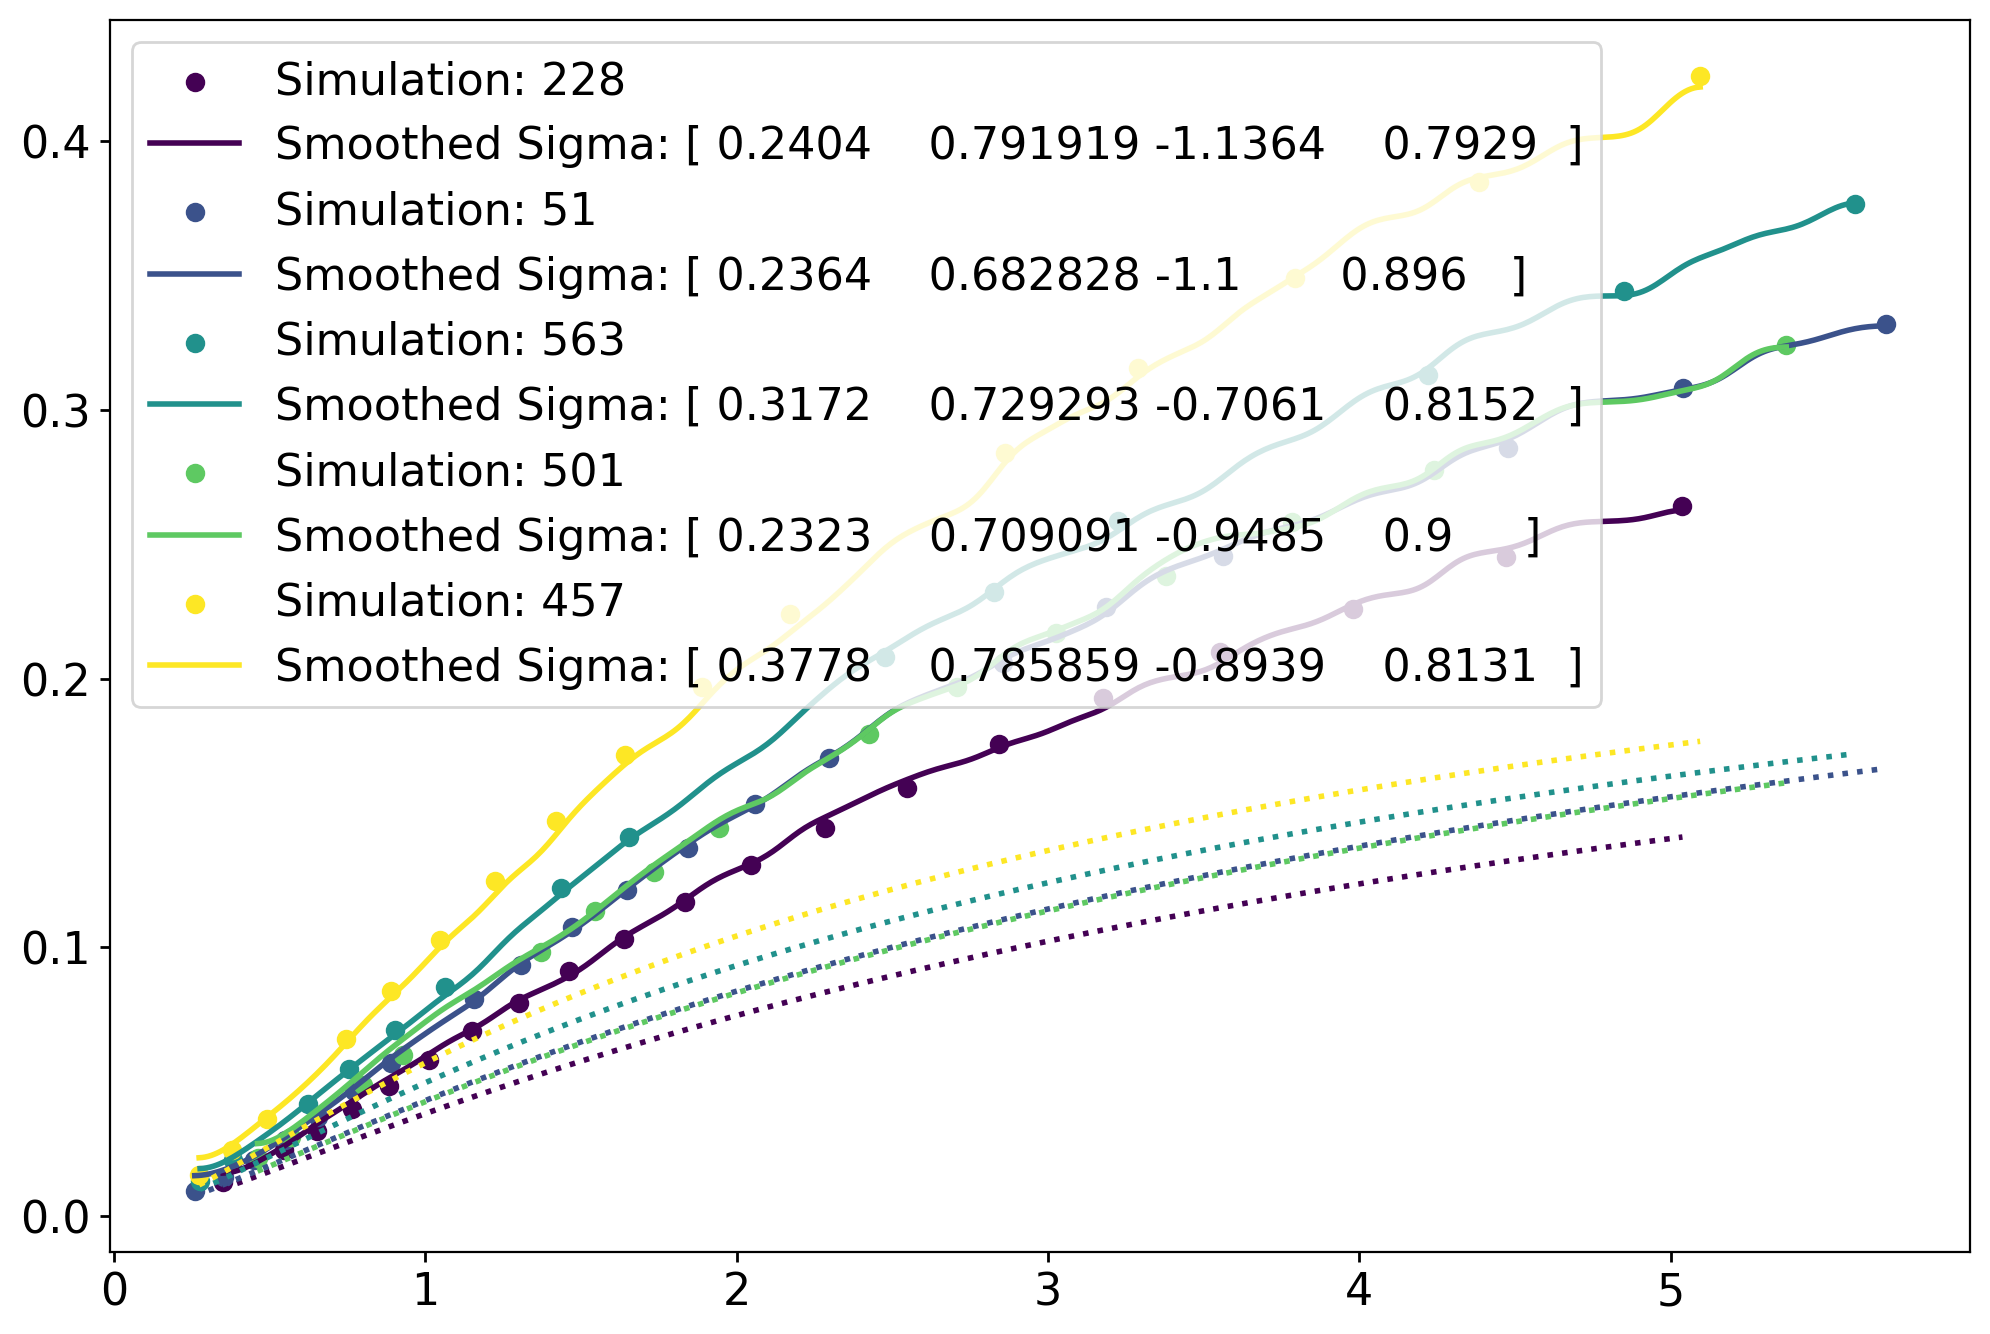

In [62]:
import random
from scipy.ndimage import gaussian_filter1d
%config InlineBackend.figure_format ='retina'
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

colors = plt.cm.viridis(np.linspace(0, 1, 5))
plt.figure(figsize=(12, 8))

random.seed(42)
for idx, i in enumerate(random.sample(range(1101), 5)):

    c0 = df.merge(df[['Om', 'h', 'w', 's8']].iloc[[i]], on=['Om', 'h', 'w', 's8'])
    color = colors[idx]  # Select color for this iteration
    plt.scatter(c0['z'], np.sqrt(c0['var']), color=color, label=f'Simulation: {i}')

    redshifts = np.linspace(c0['z'].min(), c0['z'].max(), 500)

    cosmo = c0[['Om', 'h', 'w', 's8']].iloc[0].to_numpy()

    sigma = np.array([])
    sigma_old = np.array([])
    for red in redshifts:
        cosmo0=cosmo
        cosmo0 = np.append(cosmo0,red)
        sigma = np.append(sigma, ace_lensing.predict_sigma(*cosmo0, verbose=False))
        sigma_smoothed = gaussian_filter1d(sigma, sigma=7)
        sigma_old = np.append(sigma_old, sigma_lens(red, cosmo[-1], cosmo[0]))

    #plt.plot(redshifts, sigma, label=f'Original Sigma {i}', alpha=0.5, color=color)
    plt.plot(redshifts, sigma_smoothed, label=f'Smoothed Sigma: {cosmo}', color=color)
    plt.plot(redshifts, sigma_old, linestyle=':', color=color)
plt.legend()
#plt.xscale('log')
plt.show()

In [63]:
def mn(x,y,r):
    """
    Calculates the nth central moment of a distribution from its pdf.

    Parameters
    ----------
    x : array-like
        X-axis values of the distribution.
    y : array-like
        Probability density function values corresponding to `x`.
    r : int
        Order of the moment to calculate.

    Returns
    -------
    float
        The nth central moment of the distribution.

    Notes
    -----
    For `r=1`, this function returns the mean. For other values, it computes higher order central moments.
    """
    if r == 1:
        return np.trapz(x*y, x)  # Return the mean for the first moment
    mean = np.trapz(x*y, x)
    return np.trapz((x - mean)**r * y, x) 


In [76]:
def central_moment_magnitude(mu, pdf, n):

    # Change of parameter from magnification to magnitude
    Dm = -2.5 * np.log10(mu)

    # Jacobian
    jac = np.log(10) *  mu / 2.5 

    # Change of function
    pdf_delta_m = pdf * jac

    # Normalization
    pdf_delta_m /= np.trapz(pdf_delta_m,Dm)

    return mn(Dm, pdf_delta_m, n)

(\mu - mean )^2

Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=0.3511
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=0.39843333333333336
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=0.4457666666666667
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=0.4931
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=0.5404333333333333
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=0.5877666666666667
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=0.6351
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=0.6824333333333333
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=0.7297666666666667
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=0.7771


/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/3391464739.py:13: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical inte

Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=0.8244333333333334
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=0.8717666666666666
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=0.9191
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=0.9664333333333333
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=1.0137666666666667
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=1.0611
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=1.1084333333333334
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=1.1557666666666666
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=1.2031
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=1.2504333333333333
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=1.2977666666666667


/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/3391464739.py:13: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  pdf_delta_m /= np.trapz(pdf_delta_m,Dm)
/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/1428289024.py:25: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  mean = np.trapz(x*y, x)
/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/1428289024.py:26: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz((x - mean)**r * y, x)
/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.2 when using version 1.6.1. This might lead to breaking code o

Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=1.3451
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=1.3924333333333332
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=1.4397666666666666
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=1.4870999999999999
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=1.5344333333333333
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=1.5817666666666665
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=1.6291
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=1.6764333333333332
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=1.7237666666666667
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=1.7711


/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/3391464739.py:13: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  pdf_delta_m /= np.trapz(pdf_delta_m,Dm)
/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/1428289024.py:25: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  mean = np.trapz(x*y, x)
/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/1428289024.py:26: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz((x - mean)**r * y, x)
/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.2 when using version 1.6.1. This might lead to breaking code o

Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=1.8184333333333333
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=1.8657666666666666
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=1.9130999999999998
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=1.9604333333333333
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=2.0077666666666665
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=2.0551
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=2.1024333333333334
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=2.149766666666667
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=2.1971
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=2.2444333333333333


/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/3391464739.py:13: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  pdf_delta_m /= np.trapz(pdf_delta_m,Dm)
/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/1428289024.py:25: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  mean = np.trapz(x*y, x)
/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/1428289024.py:26: Deprec

Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=2.2917666666666667
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=2.3391
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=2.3864333333333336
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=2.4337666666666666
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=2.4811
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=2.5284333333333335


/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/3391464739.py:13: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  pdf_delta_m /= np.trapz(pdf_delta_m,Dm)
/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/1428289024.py:25: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  mean = np.trapz(x*y, x)
/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/1428289024.py:26: Deprec

Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=2.575766666666667
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=2.6231
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=2.6704333333333334
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=2.717766666666667
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=2.7651
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=2.8124333333333333
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=2.859766666666667
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=2.9071000000000002
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=2.9544333333333332
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=3.0017666666666667


/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/3391464739.py:13: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  pdf_delta_m /= np.trapz(pdf_delta_m,Dm)
/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/1428289024.py:25: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  mean = np.trapz(x*y, x)
/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/1428289024.py:26: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz((x - mean)**r * y, x)
/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.2 when using version 1.6.1. This might lead to breaking code o

Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=3.0491
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=3.0964333333333336
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=3.1437666666666666
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=3.1911
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=3.2384333333333335
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=3.285766666666667
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=3.3331
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=3.3804333333333334
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=3.427766666666667
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=3.4751


/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/3391464739.py:13: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  pdf_delta_m /= np.trapz(pdf_delta_m,Dm)
/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/1428289024.py:25: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  mean = np.trapz(x*y, x)
/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/1428289024.py:26: Deprec

Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=3.5224333333333333
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=3.5697666666666668
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=3.6171
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=3.664433333333333
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=3.7117666666666667
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=3.7591
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=3.8064333333333336
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=3.8537666666666666
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=3.9011


/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/3391464739.py:13: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  pdf_delta_m /= np.trapz(pdf_delta_m,Dm)
/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/1428289024.py:25: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  mean = np.trapz(x*y, x)
/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/1428289024.py:26: Deprec

Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=3.9484333333333335
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=3.995766666666667
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=4.0431
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=4.090433333333333
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=4.137766666666667


/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/3391464739.py:13: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  pdf_delta_m /= np.trapz(pdf_delta_m,Dm)
/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/1428289024.py:25: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  mean = np.trapz(x*y, x)
/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/1428289024.py:26: Deprec

Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=4.185099999999999
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=4.232433333333333
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=4.279766666666666
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=4.3271
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=4.374433333333333
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=4.421766666666667
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=4.469099999999999
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=4.516433333333333
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=4.563766666666666
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=4.6110999999999995
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=4.65843333333333

/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/3391464739.py:13: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  pdf_delta_m /= np.trapz(pdf_delta_m,Dm)
/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/1428289024.py:25: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  mean = np.trapz(x*y, x)
/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/1428289024.py:26: Deprec

Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=4.7531
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=4.800433333333333
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=4.847766666666666
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=4.895099999999999
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=4.942433333333333
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=4.989766666666666
Received input parameters: Om=0.3086, h=0.791919, w=-1.1364, s8=0.8288, z=5.0371


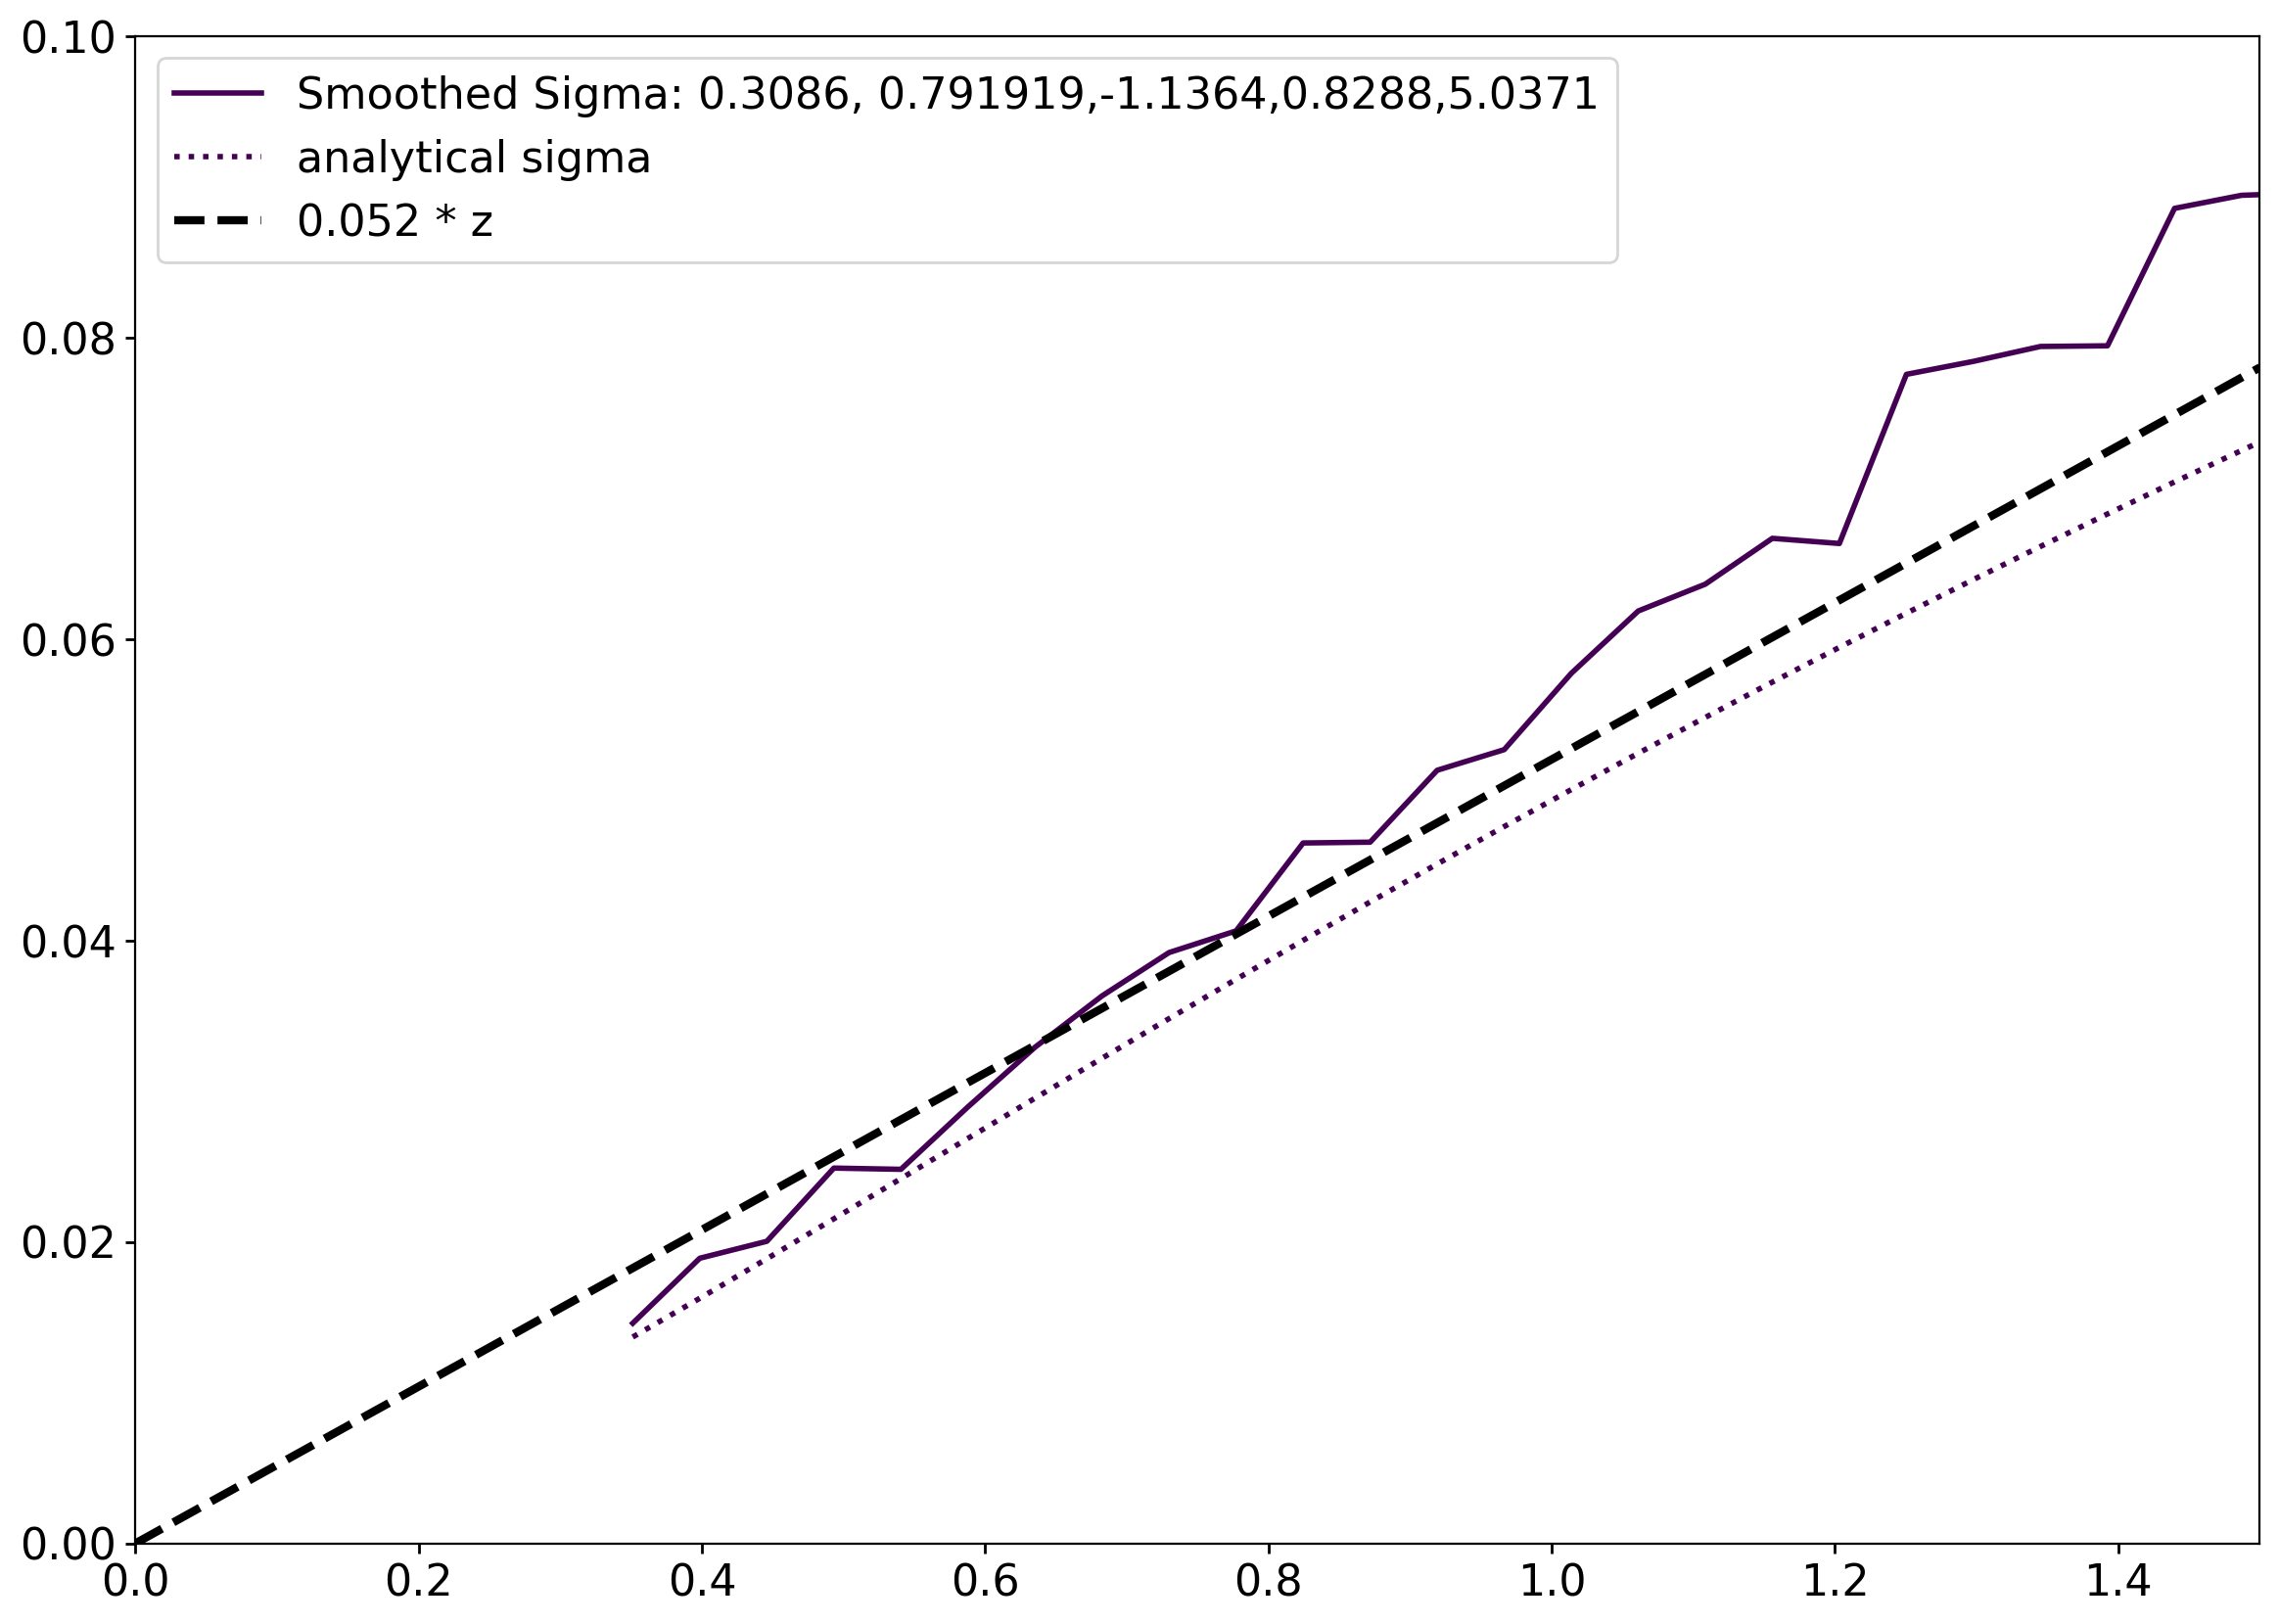

In [ ]:
import random
from scipy.ndimage import gaussian_filter1d
%config InlineBackend.figure_format ='retina'
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


number_cosmo = 1
colors = plt.cm.viridis(np.linspace(0, 1, number_cosmo))
plt.figure(figsize=(14, 10))

random.seed(42)
for idx, i in enumerate(random.sample(range(1101), number_cosmo)):

    c0 = df.merge(df[['Om', 'h', 'w', 's8']].iloc[[i]], on=['Om', 'h', 'w', 's8'])
    color = colors[idx]  # Select color for this iteration
    # plt.scatter(c0['z'], np.sqrt(c0['var'])*2.5/np.log(10), color=color, label=f'Simulation: {i}')

    redshifts = np.linspace(c0['z'].min(), c0['z'].max(), 100)

    cosmo = c0[['Om', 'h', 'w', 's8']].iloc[0].to_numpy()

    sigma = np.array([])
    sigma_old = np.array([])
    #sigma_old2 = np.array([])
    for red in redshifts:
        cosmo0=cosmo
        cosmo0 = np.append(cosmo0,red)
        # sigma = np.append(sigma, ace_lensing.predict_sigma(*cosmo0, verbose=False))
        mu, pdf = ace_lensing.predict_pdf(1-0.6914, cosmo0[1],cosmo0[2],0.8288,red)
        sigma_calculated = np.sqrt(central_moment_magnitude(mu, pdf, 2))
        sigma = np.append(sigma, sigma_calculated)
        # sigma_smoothed = gaussian_filter1d(sigma, sigma=7)
        sigma_old = np.append(sigma_old, sigma_lens(red, 0.8288, 1-0.6914))
        #sigma_old2 = np.append(sigma_old2, sigma_lens2(red))

    #plt.plot(redshifts, sigma, label=f'Original Sigma {i}', alpha=0.5, color=color)
    plt.plot(redshifts, sigma, label=f'Smoothed Sigma: {1-0.6914}, {cosmo[1]},{cosmo[2]},0.8288,{red}', color=color)
    plt.plot(redshifts, sigma_old, linestyle=':', color=color, label="analytical sigma")
plt.plot(np.linspace(0,1.5,2), np.linspace(0,1.5,2)*0.052, color='black', linewidth=3, ls='--', label="0.052 * z")
# plt.plot(np.linspace(0,1.5,100), sigma_lens(np.linspace(0,1.5,100), 0.8288, 1-0.6914), color='red', linewidth=3, ls=":", label=f"sigma lens formula with s8 = 0.8288 Om = {1-0.6914}")
plt.legend()
#plt.xscale('log')
plt.xlim(0,1.5)
plt.ylim(0,.1)
plt.show()

In [126]:
import pandas as pd


def read_dat(name, skip_rows=1):
    """
    extracts columns of the .dat or .csv files.


        INPUT:
    name (str):         Directory of the file: /dir/file
    skip_rows (int):    Number of rows to skip, set to 1

        OUTPUT:
    float array: 1st column of file
    float array: 2nd column of file
    """

    df = pd.read_csv(name, delim_whitespace=True, skiprows=skip_rows)

    # Extract the first column into a numpy array
    first_column = df.iloc[:, 0].values.astype(float)

    # Extract the second columns into a numpy array
    second_column = df.iloc[:, 1].values.astype(float)

    return first_column, second_column


def extract_parameters(name):
    """
    extracts header of .dat file. 
    works with the convergence PDF .dat files Valerio created with TurboGL
    returns redshift and cosmological parameters of the PDF.
    

        INPUT:
    name (str): Directory of the file: /dir/file

        OUTPUT: 
    float:              Redshift
    float numpy array:  Containing 4 Elements
        Omega Matter Today, 
        Little h (Hubble Parameter), 
        Dark Energy Equation of State, 
        Sigma 8 
    """
    with open(name, 'r') as file:
        first_line = file.readline().strip()  # Read the first line and remove leading/trailing whitespace
    # First line of the files are
    # kappa	PDF at z=0.5 - {Om=0.305051, h=0.751515, w=-1.23939, sigma8=0.857576}
    # Split the first line by '-' to get the second part containing the parameters
    z = float(first_line.split(' ')[2].split('=')[1])

    # Split the parameters by commas and extract the values
    parameters = np.empty(4)
    for i in range(4):
        parameters[i] = first_line.split(' ')[4+i].split('=')[1].split(',')[0].replace('}', '')


    return z, parameters

In [ ]:
for z in [1,2,3,5]:
    plt.figure(figsize=(8,6))
    cosmology = [0.301, 0.682, -1, 0.798, z]
    mu_pred, pdf_pred = ace_lensing.predict_pdf(*cosmology)
    mu_test, pdf_test = read_dat(f'/home/tunc/Downloads/log_mu_full_NB_uhr_2048_pdf_z{z}.txt', skip_rows=0)
    plt.plot(mu_test, pdf_test, label = 'test', linestyle='--')
    plt.plot(mu_pred, pdf_pred, label = 'prediction')
    plt.yscale("log")
    plt.xlim(0,4)
    plt.ylim(1e-4)
    plt.legend()
    plt.title(f'Redshift = {z}')

Received input parameters: Om=0.301, h=0.682, w=-1, s8=0.798, z=1


/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


NameError: name 'read_dat' is not defined

<Figure size 800x600 with 0 Axes>

Received input parameters: Om=0.274, h=0.705, w=-1, s8=0.812, z=2
Received input parameters: Om=0.2, h=0.705, w=-1, s8=0.812, z=2
Received input parameters: Om=0.274, h=0.705, w=-1, s8=0.812, z=1
Received input parameters: Om=0.2, h=0.705, w=-1, s8=0.812, z=1


/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.2 when

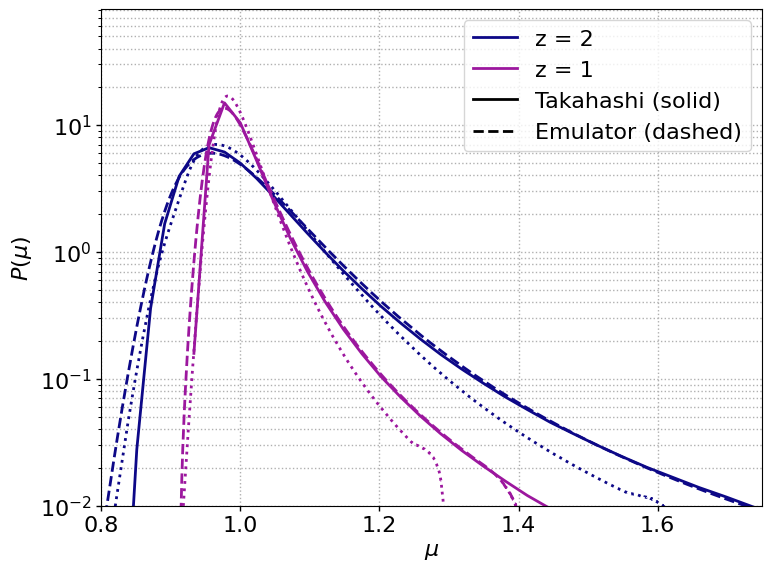

In [67]:
import matplotlib.cm as cm
from matplotlib.lines import Line2D
z = [2,1]

colors = [cm.plasma(i / 3) for i in range(len(z))] 
plt.figure(figsize=(8,6))
for i,z_n in enumerate(z):
    data = np.loadtxt(f'/Users/tunc/Documents/work/Lensing/Paper/pdf-tunc/takahashi/magnificationPDF_rg3kpc_z{z_n}.txt', usecols=(0, 1))

    mu_t = data[:, 0] 
    pdf_t = data[:, 1] 

    #parameter_names = ["Om",	"h",	"w",	"s8",   "z"]
    takahashi_parameters = [0.274,	0.705,	-1,	0.812,   z_n]
    takahashi_parameters_test = [0.2,	0.705,	-1,	0.812,   z_n]

    mu_emulator, pdf_emulator = ace_lensing.predict_pdf(*takahashi_parameters)
    mu_emulator_test, pdf_emulator_test = ace_lensing.predict_pdf(*takahashi_parameters_test)

    plt.plot(mu_t, pdf_t, label = 'takahashi', color=colors[i])
    plt.plot(mu_emulator, pdf_emulator, label = 'emulator', ls="--",color=colors[i])
    plt.plot(mu_emulator_test, pdf_emulator_test, label = 'emulator', ls=":",color=colors[i])

# Custom legend handles
redshift_labels = [Line2D([0], [0], color=colors[i], lw=2, label=f'z = {z[i]}') for i in range(len(z))]
style_labels = [
    Line2D([0], [0], color='black', lw=2, label='Takahashi (solid)'),
    Line2D([0], [0], color='black', lw=2, ls='--', label='Emulator (dashed)')
]

# Combine and add legend
plt.legend(handles=redshift_labels + style_labels, loc='upper right')

plt.yscale("log")
plt.xlim(0.8, 1.75)
plt.ylim(1e-2)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$P(\mu)$')
# plt.title('Magnification PDF Comparison')
plt.grid(True, which="both", ls=":")
plt.tight_layout()
plt.show()

# PINOCCHIO & TURBO GL

$$\Omega_m = 0.301,\; \Omega_b = 0.048,\; \Omega_\lambda = 0.699,\; h = 0.682,\; \sigma_8 = 0.798,\; \text{and}\; n_s = 0.973$$

Received input parameters: Om=0.301, h=0.682, w=-1, s8=0.798, z=5
Received input parameters: Om=0.301, h=0.682, w=-1, s8=0.798, z=3
Received input parameters: Om=0.301, h=0.682, w=-1, s8=0.798, z=2
Received input parameters: Om=0.301, h=0.682, w=-1, s8=0.798, z=1


/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.2 when

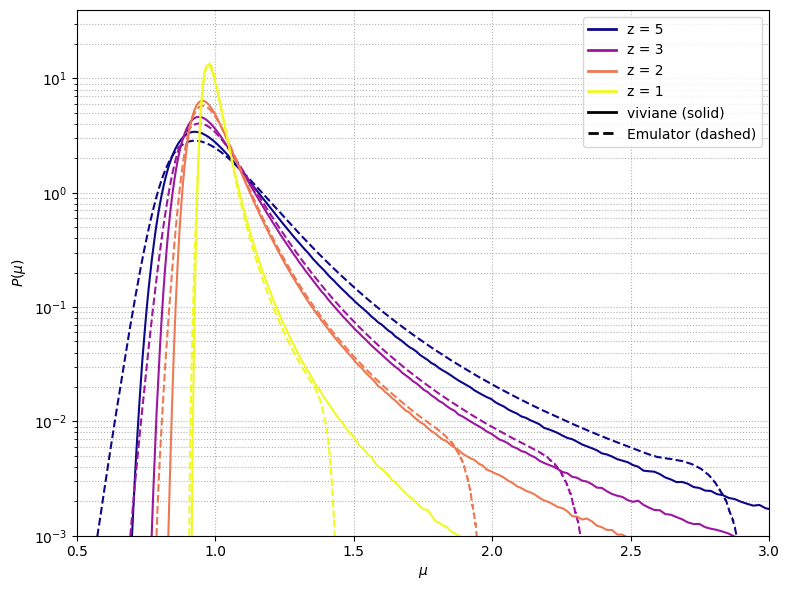

In [53]:
import matplotlib.cm as cm
from matplotlib.lines import Line2D
name = "viviane"
z = [5,3,2,1]

colors = [cm.plasma(i / 3) for i in range(len(z))] 
plt.figure(figsize=(8,6))
for i,z_n in enumerate(z):
    data_v = np.loadtxt(f'/Users/tunc/Documents/work/Lensing/Paper/pdf-tunc/decontr/pinocchio/log_mu_full_LPT_uhr_2048_pdf_z{z_n}.txt', usecols=(0, 1))

    mu_v = data_v[:, 0]
    pdf_v = data_v[:, 1]

    #parameter_names = ["Om",	"h",	"w",	"s8",   "z"]
    viviane_parameters = [0.301,	0.682,	-1,	0.798,   z_n]
    mu_emulator_v, pdf_emulator_v = ace_lensing.predict_pdf(*viviane_parameters)
    plt.plot(mu_v, pdf_v, color=colors[i])
    plt.plot(mu_emulator_v, pdf_emulator_v, ls="--",color=colors[i])

# Custom legend handles
redshift_labels = [Line2D([0], [0], color=colors[i], lw=2, label=f'z = {z[i]}') for i in range(len(z))]
style_labels = [
    Line2D([0], [0], color='black', lw=2, label=f'{name} (solid)'),
    Line2D([0], [0], color='black', lw=2, ls='--', label='Emulator (dashed)')
]

# Combine and add legend
plt.legend(handles=redshift_labels + style_labels, loc='upper right')

plt.yscale("log")
plt.xlim(0.5, 3)
plt.ylim(1e-3)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$P(\mu)$')
# plt.title('Magnification PDF Comparison')
plt.grid(True, which="both", ls=":")
plt.tight_layout()
plt.show()

Received input parameters: Om=0.301, h=0.682, w=-1, s8=0.798, z=2
Received input parameters: Om=0.301, h=0.682, w=-1, s8=0.798, z=1


/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.2 when

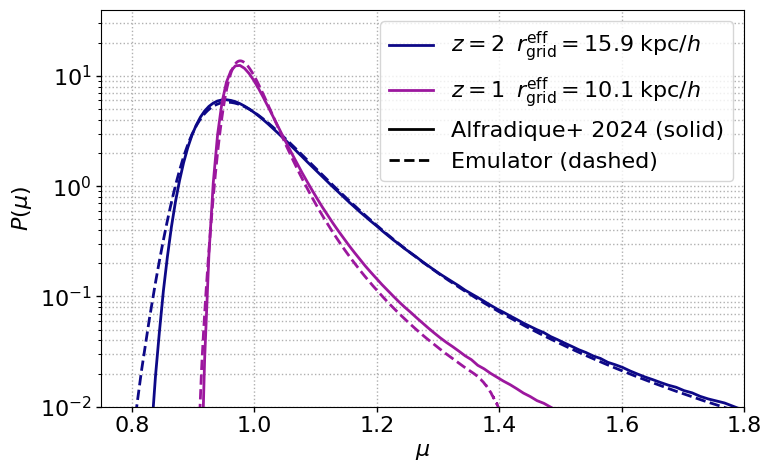

In [68]:
import matplotlib.cm as cm
from matplotlib.lines import Line2D
name = "Alfradique+ 2024"
z = [2,1]
rgrid = [15.9 ,10.1]

colors = [cm.plasma(i / 3) for i in range(len(z))] 
plt.figure(figsize=(8,5))
for i,z_n in enumerate(z):
    data_v = np.loadtxt(f'/Users/tunc/Documents/work/Lensing/Paper/pdf-tunc/decontr/nb/log_mu_full_NB_uhr_2048_pdf_z{z_n}.txt', usecols=(0, 1))

    mu_v = data_v[:, 0]
    pdf_v = data_v[:, 1]

    #parameter_names = ["Om",	"h",	"w",	"s8",   "z"]
    viviane_parameters = [0.301,	0.682,	-1,	0.798,   z_n]
    mu_emulator_v, pdf_emulator_v = ace_lensing.predict_pdf(*viviane_parameters)
    plt.plot(mu_v, pdf_v, color=colors[i])
    plt.plot(mu_emulator_v, pdf_emulator_v, ls="--",color=colors[i])

# Custom legend handles
redshift_labels = [Line2D([0], [0], color=colors[i], lw=2, label=fr'$z = {z[i]}\;\;r_{{\text{{grid}}}}^{{\text{{eff}}}} = {rgrid[i]}\;\mathrm{{kpc}}/h$') for i in range(len(z))]
style_labels = [
    Line2D([0], [0], color='black', lw=2, label=f'{name} (solid)'),
    Line2D([0], [0], color='black', lw=2, ls='--', label='Emulator (dashed)')
]

# Combine and add legend
plt.legend(handles=redshift_labels + style_labels, loc='upper right')

plt.yscale("log")
plt.xlim(0.75, 1.8 )
plt.ylim(1e-2)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$P(\mu)$')
# plt.title('Magnification PDF Comparison')
plt.grid(True, which="both", ls=":")
plt.tight_layout()
plt.savefig("viviane.pdf", bbox_inches='tight', dpi=300)
plt.show()


# MAGNETICUM

$$\Omega_m = 0.272,\; \Omega_b = 0.0451,\; \Omega_\lambda = 0.728,\; h = 0.704,\; \sigma_8 = 0.809,\; \text{and}\; n_s = 0.963$$

Received input parameters: Om=0.272, h=0.704, w=-1, s8=0.809, z=2
Received input parameters: Om=0.301, h=0.682, w=-1, s8=0.798, z=2
Received input parameters: Om=0.272, h=0.704, w=-1, s8=0.809, z=1
Received input parameters: Om=0.301, h=0.682, w=-1, s8=0.798, z=1


/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.2 when

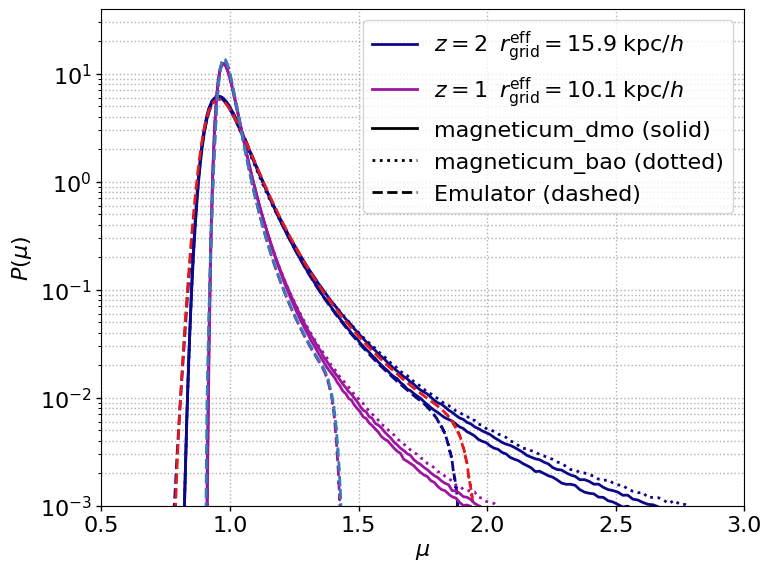

In [54]:
import matplotlib.cm as cm
from matplotlib.lines import Line2D
name = "magneticum"
z = [2,1]
rgrid = [15.9 ,10.1]
colors = [cm.plasma(i / 3) for i in range(len(z))] 
plt.figure(figsize=(8,6))
for i,z_n in enumerate(z):
    data = np.loadtxt(f'/Users/tunc/Documents/work/Lensing/Paper/pdf-tunc/magneticum/dmo/log_mu_full_hr_dm_2048_pdf_z{z_n}.txt', usecols=(0, 1))
    mu = data[:, 0]
    pdf = data[:, 1]

    data_bao = np.loadtxt(f'/Users/tunc/Documents/work/Lensing/Paper/pdf-tunc/magneticum/bao/log_mu_full_hr_bao_2048_pdf_z{z_n}.txt', usecols=(0, 1))

    mu_bao = data_bao[:, 0]
    pdf_bao = data_bao[:, 1]

    #parameter_names = ["Om",	"h",	"w",	"s8",   "z"]
    magneticum_parameters = [0.272, 0.704,	-1,	0.809,   z_n]
    mu_emulator, pdf_emulator = ace_lensing.predict_pdf(*magneticum_parameters)
    plt.plot(mu_bao, pdf_bao, color=colors[i], ls=":")
    plt.plot(mu, pdf, color=colors[i])
    plt.plot(mu_emulator, pdf_emulator, ls="--",color=colors[i])

    data_v = np.loadtxt(f'/Users/tunc/Documents/work/Lensing/Paper/pdf-tunc/decontr/nb/log_mu_full_NB_uhr_2048_pdf_z{z_n}.txt', usecols=(0, 1))

    mu_v = data_v[:, 0]
    pdf_v = data_v[:, 1]

    #parameter_names = ["Om",	"h",	"w",	"s8",   "z"]
    viviane_parameters = [0.301,	0.682,	-1,	0.798,   z_n]
    mu_emulator_v, pdf_emulator_v = ace_lensing.predict_pdf(*viviane_parameters)
    plt.plot(mu_v, pdf_v, color=colors[i])
    plt.plot(mu_emulator_v, pdf_emulator_v, ls="--")

# Custom legend handles
redshift_labels = [Line2D([0], [0], color=colors[i], lw=2, label=fr'$z = {z[i]}\;\;r_{{\text{{grid}}}}^{{\text{{eff}}}} = {rgrid[i]}\;\mathrm{{kpc}}/h$') for i in range(len(z))]
style_labels = [
    Line2D([0], [0], color='black', lw=2, label=f'{name}_dmo (solid)'),
    Line2D([0], [0], color='black', lw=2, ls=':', label=f'{name}_bao (dotted)'),
    Line2D([0], [0], color='black', lw=2, ls='--', label='Emulator (dashed)'),
]

# Combine and add legend
plt.legend(handles=redshift_labels + style_labels, loc='upper right')

plt.yscale("log")
plt.xlim(0.5, 3)
plt.ylim(1e-3)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$P(\mu)$')
# plt.title('Magnification PDF Comparison')
plt.grid(True, which="both", ls=":")
plt.tight_layout()
plt.show()

In [42]:
#plot style

from cycler import cycler
import seaborn as sns

fontsize = 16
#plt.style.use('ggplot')
plt.rcParams['font.size'] = fontsize
plt.rcParams['axes.labelsize'] = fontsize
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize
#plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['grid.linewidth'] = 1
plt.rcParams['xtick.minor.width'] = .75
plt.rcParams['ytick.minor.width'] = .75
plt.rcParams['legend.fontsize'] = fontsize
plt.rcParams['figure.titlesize'] = fontsize
#plt.rcParams['axes.facecolor'] = u'#E2E2E2'
plt.rcParams['figure.figsize'] = (10, 5.5)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.prop_cycle']=cycler('color', ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#a65628','#f781bf', '#999999', 'k'])
plt.rcParams['legend.fancybox'] = True
plt.rcParams['legend.facecolor'] = '#FFFFFF'
plt.rcParams['lines.linewidth'] = 2

Received input parameters: Om=0.272, h=0.704, w=-1, s8=0.809, z=2
Received input parameters: Om=0.272, h=0.704, w=-1, s8=0.809, z=1


/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.2 when

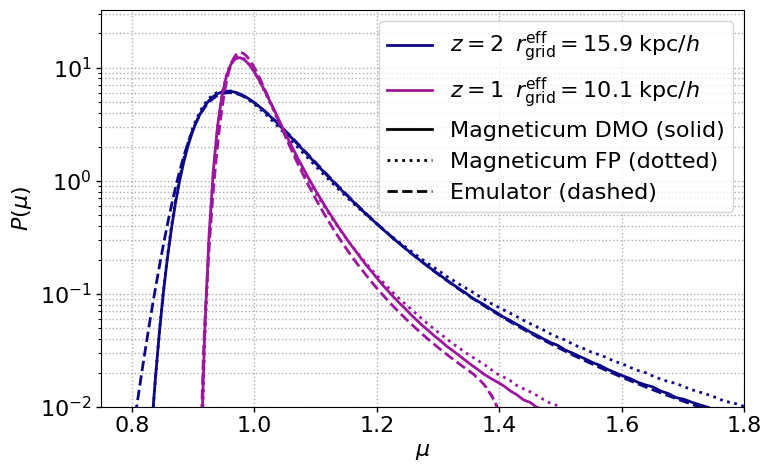

In [58]:
import matplotlib.cm as cm
from matplotlib.lines import Line2D
name = "Magneticum"
z = [2,1]
rgrid = [15.9, 10.1]

colors = [cm.plasma(i / 3) for i in range(len(z))] 
plt.figure(figsize=(8,5))
for i,z_n in enumerate(z):
    data = np.loadtxt(f'/Users/tunc/Documents/work/Lensing/Paper/pdf-tunc/magneticum/dmo/log_mu_full_hr_dm_2048_pdf_z{z_n}.txt', usecols=(0, 1))
    mu = data[:, 0]
    pdf = data[:, 1]

    data_bao = np.loadtxt(f'/Users/tunc/Documents/work/Lensing/Paper/pdf-tunc/magneticum/bao/log_mu_full_hr_bao_2048_pdf_z{z_n}.txt', usecols=(0, 1))

    mu_bao = data_bao[:, 0]
    pdf_bao = data_bao[:, 1]

    #parameter_names = ["Om",	"h",	"w",	"s8",   "z"]
    magneticum_parameters = [0.272, 0.704,	-1,	0.809,   z_n]
    mu_emulator, pdf_emulator = ace_lensing.predict_pdf(*magneticum_parameters)
    plt.plot(mu_bao, pdf_bao, color=colors[i], ls=":")
    plt.plot(mu, pdf, color=colors[i])
    plt.plot(mu_emulator, pdf_emulator, ls="--",color=colors[i])

    data_v = np.loadtxt(f'/Users/tunc/Documents/work/Lensing/Paper/pdf-tunc/decontr/nb/log_mu_full_NB_uhr_2048_pdf_z{z_n}.txt', usecols=(0, 1))

    mu_v = data_v[:, 0]
    pdf_v = data_v[:, 1]

# Legends
redshift_labels = [Line2D([0], [0], color=colors[i], lw=2, label=fr'$z = {z[i]}\;\;r_{{\text{{grid}}}}^{{\text{{eff}}}} = {rgrid[i]}\;\mathrm{{kpc}}/h$') for i in range(len(z))]
style_labels = [
    Line2D([0], [0], color='black', lw=2, label=f'{name} DMO (solid)'),
    Line2D([0], [0], color='black', lw=2, ls=':', label=f'{name} FP (dotted)'),
    Line2D([0], [0], color='black', lw=2, ls='--', label='Emulator (dashed)'),
]

# Combine and add legend
plt.legend(handles=redshift_labels + style_labels, loc='upper right')

plt.yscale("log")
plt.xlim(0.75, 1.8)
plt.ylim(1e-2)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$P(\mu)$')
# plt.title('Magnification PDF Comparison')
plt.grid(True, which="both", ls=":")
plt.tight_layout()
plt.savefig("magneticum.pdf", bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
3600/2048

1.7578125

Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=0.2
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=0.2048048048048048
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=0.20960960960960962
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=0.21441441441441442
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=0.21921921921921922
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=0.22402402402402405
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=0.22882882882882882
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=0.23363363363363365
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=0.23843843843843845
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=0.24324324324324326
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=0.24804804804804806
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=0.25285285285285286
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=0.2576576576576577
Rece

/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/3836780499.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mean[i] = ace_lensing.predict_mean(0.3, 0.7, -1, 0.8, red)
/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.2 when using version 1.6.1. This might lead to 

Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=0.6276276276276276
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=0.6324324324324324
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=0.6372372372372372
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=0.6420420420420421
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=0.6468468468468469
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=0.6516516516516516
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=0.6564564564564564
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=0.6612612612612612
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=0.666066066066066
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=0.6708708708708708
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=0.6756756756756757
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=0.6804804804804805
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=0.6852852852852853


/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/3836780499.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mean[i] = ace_lensing.predict_mean(0.3, 0.7, -1, 0.8, red)
/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/3836780499.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single 

Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=1.0888888888888888
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=1.0936936936936936
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=1.0984984984984985
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=1.1033033033033033
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=1.1081081081081081
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=1.112912912912913
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=1.1177177177177178
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=1.1225225225225224
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=1.1273273273273272
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=1.132132132132132
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=1.1369369369369369
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=1.1417417417417417
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=1.1465465465465465
R

/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/3836780499.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mean[i] = ace_lensing.predict_mean(0.3, 0.7, -1, 0.8, red)
/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/3836780499.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single 

Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=1.5405405405405403
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=1.5453453453453452
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=1.55015015015015
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=1.5549549549549548
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=1.5597597597597597
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=1.5645645645645645
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=1.5693693693693693
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=1.5741741741741742
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=1.5789789789789788
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=1.5837837837837836
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=1.5885885885885884
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=1.5933933933933933
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=1.598198198198198
Re

/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/3836780499.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mean[i] = ace_lensing.predict_mean(0.3, 0.7, -1, 0.8, red)
/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/3836780499.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single 

Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=1.9921921921921921
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=1.996996996996997
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=2.001801801801802
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=2.0066066066066064
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=2.0114114114114114
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=2.016216216216216
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=2.021021021021021
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=2.0258258258258257
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=2.0306306306306308
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=2.0354354354354354
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=2.0402402402402404
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=2.045045045045045
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=2.0498498498498496
Rece

/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/3836780499.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mean[i] = ace_lensing.predict_mean(0.3, 0.7, -1, 0.8, red)
/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/3836780499.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single 

Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=2.4390390390390393
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=2.443843843843844
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=2.4486486486486485
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=2.4534534534534536
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=2.458258258258258
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=2.463063063063063
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=2.467867867867868
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=2.472672672672673
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=2.4774774774774775
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=2.4822822822822825
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=2.487087087087087
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=2.4918918918918918
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=2.496696696696697
Receiv

/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/3836780499.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mean[i] = ace_lensing.predict_mean(0.3, 0.7, -1, 0.8, red)
/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/3836780499.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single 

Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=2.7033033033033034
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=2.708108108108108
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=2.712912912912913
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=2.7177177177177176
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=2.7225225225225227
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=2.7273273273273273
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=2.7321321321321324
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=2.736936936936937
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=2.741741741741742
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=2.7465465465465466
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=2.7513513513513512
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=2.7561561561561563
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=2.760960960960961
Rece

/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/3836780499.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mean[i] = ace_lensing.predict_mean(0.3, 0.7, -1, 0.8, red)
/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/3836780499.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single 

Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=3.135735735735736
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=3.1405405405405404
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=3.1453453453453455
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=3.15015015015015
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=3.154954954954955
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=3.1597597597597598
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=3.164564564564565
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=3.1693693693693694
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=3.174174174174174
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=3.178978978978979
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=3.1837837837837837
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=3.1885885885885887
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=3.1933933933933933
Receiv

/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/3836780499.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mean[i] = ace_lensing.predict_mean(0.3, 0.7, -1, 0.8, red)
/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/3836780499.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single 

Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=3.630630630630631
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=3.6354354354354355
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=3.64024024024024
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=3.645045045045045
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=3.6498498498498497
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=3.6546546546546548
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=3.6594594594594594
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=3.6642642642642644
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=3.669069069069069
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=3.673873873873874
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=3.6786786786786787
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=3.6834834834834833
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=3.6882882882882884
Recei

/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/3836780499.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mean[i] = ace_lensing.predict_mean(0.3, 0.7, -1, 0.8, red)
/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/3836780499.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single 

Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=4.111111111111111
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=4.115915915915916
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=4.120720720720721
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=4.125525525525525
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=4.13033033033033
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=4.135135135135135
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=4.13993993993994
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=4.144744744744744
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=4.149549549549549
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=4.154354354354354
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=4.159159159159159
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=4.163963963963964
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=4.168768768768769
Received input

/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/3836780499.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mean[i] = ace_lensing.predict_mean(0.3, 0.7, -1, 0.8, red)
/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/3836780499.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single 

Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=4.586786786786787
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=4.591591591591592
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=4.596396396396396
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=4.601201201201201
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=4.606006006006006
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=4.610810810810811
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=4.615615615615615
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=4.6204204204204204
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=4.6252252252252255
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=4.63003003003003
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=4.634834834834835
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=4.63963963963964
Received input parameters: Om=0.3, h=0.7, w=-1, s8=0.8, z=4.644444444444445
Received inp

/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/3836780499.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mean[i] = ace_lensing.predict_mean(0.3, 0.7, -1, 0.8, red)
/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/var/folders/ms/4jbrlf890snfm9wmbgd193740000gn/T/ipykernel_43541/3836780499.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single 

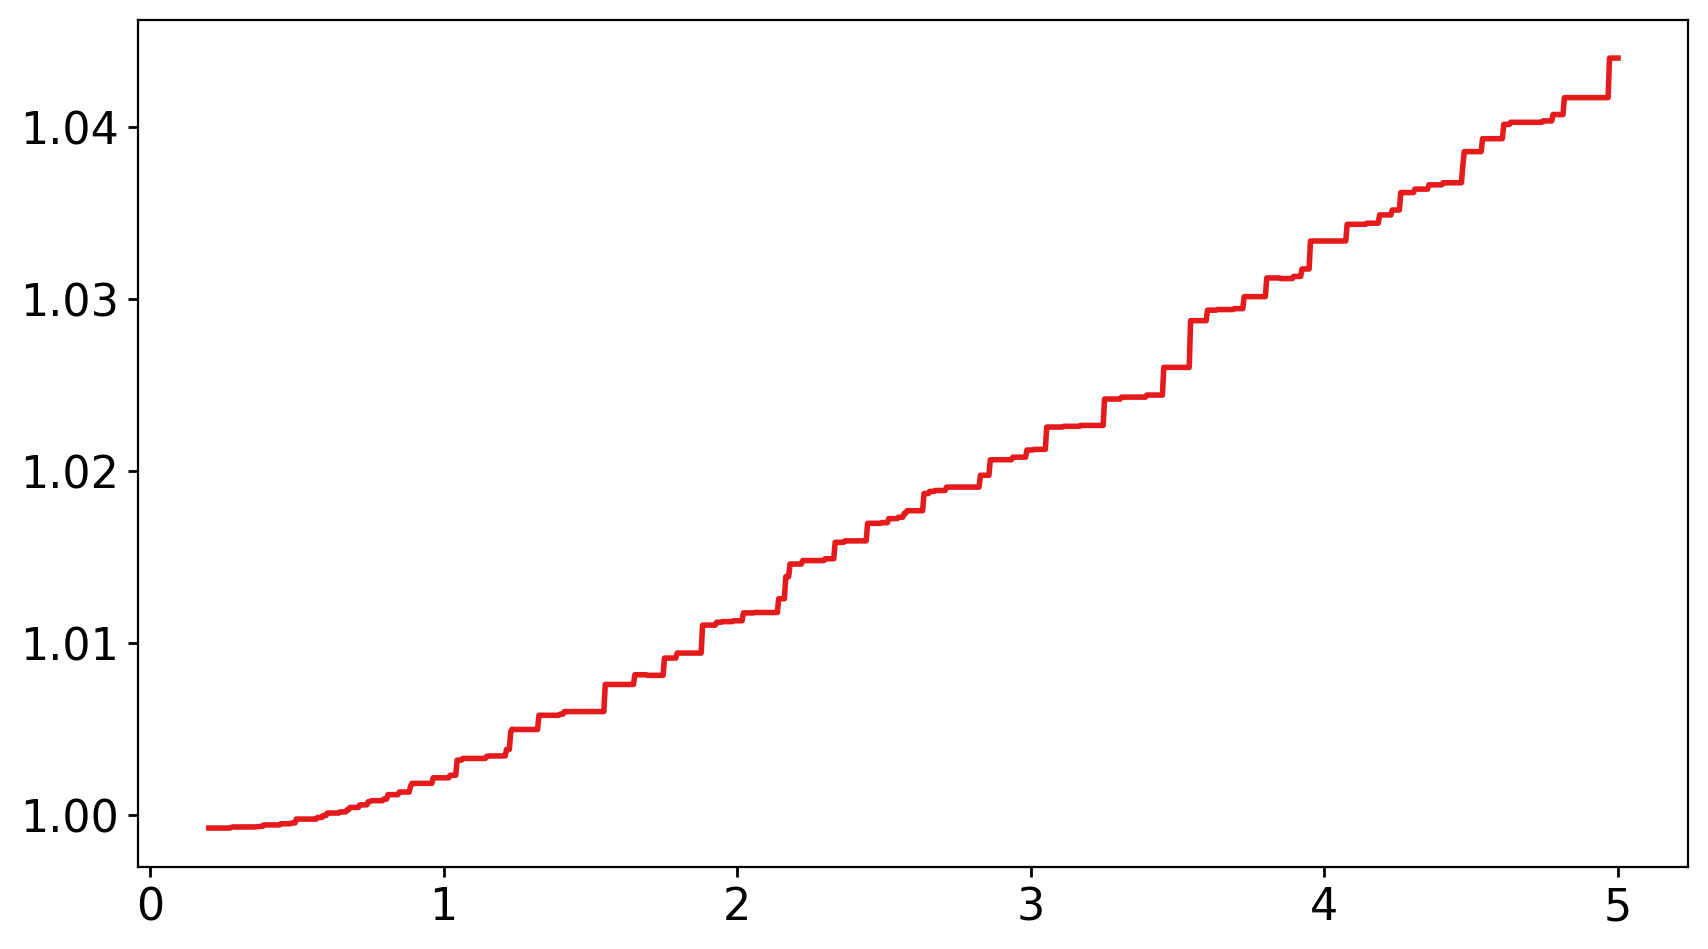

In [83]:
z_vec = np.linspace(0.2,5,1000)
mean = np.empty_like(z_vec)
for i, red in enumerate(z_vec):
    mean[i] = ace_lensing.predict_mean(0.3, 0.7, -1, 0.8, red)
plt.plot(z_vec, mean)


Received input parameters: Om=0.4, h=0.7, w=-1, s8=0.9, z=6


/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/tunc/anaconda3/envs/ACE-env/lib/python3.9/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


np.float64(0.12790817022323608)

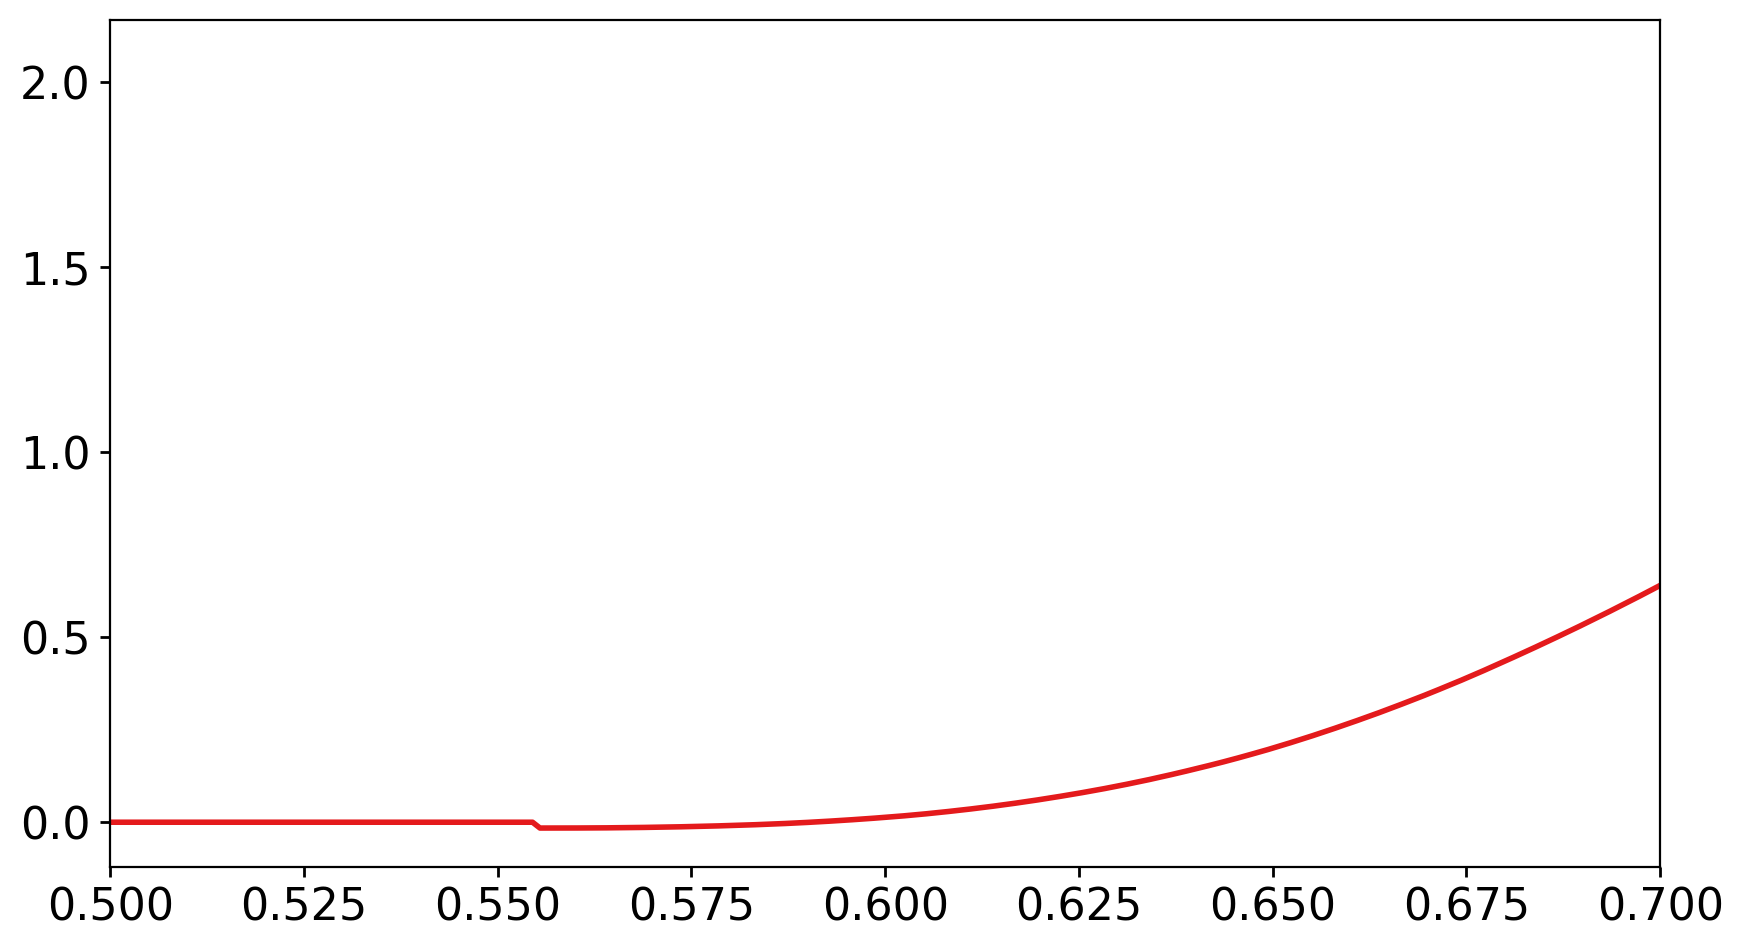

In [92]:
mu, pdf = ace_lensing.predict_pdf(0.4,0.7,-1,0.9,6)
plt.plot(mu, pdf)
plt.xlim(0.5,0.7)
np.min(mu)

np.float64(2.523985832929611)